Logistic Regression Test Accuracy: 0.690041249263406
Support Vector Machine Test Accuracy: 0.7030053034767236
Naive Bayes Test Accuracy: 0.6399528579846788
Random Forest Test Accuracy: 0.6458456098998232
Results:
                    Model  Accuracy  Precision    Recall  F1-score
0     Logistic Regression  0.690041   0.686901  0.690041  0.680784
1  Support Vector Machine  0.703005   0.699102  0.703005  0.696460
2             Naive Bayes  0.639953   0.644973  0.639953  0.599737
3           Random Forest  0.645846   0.659088  0.645846  0.629236


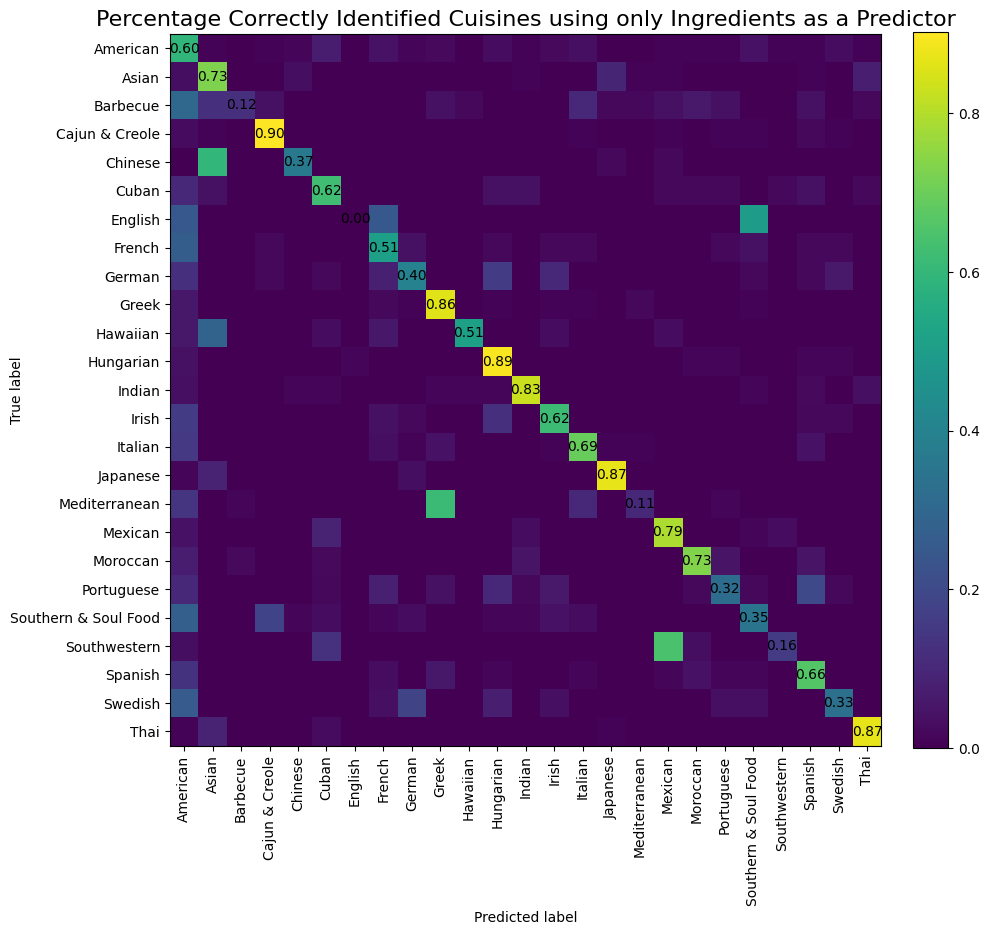

<Figure size 1000x600 with 0 Axes>

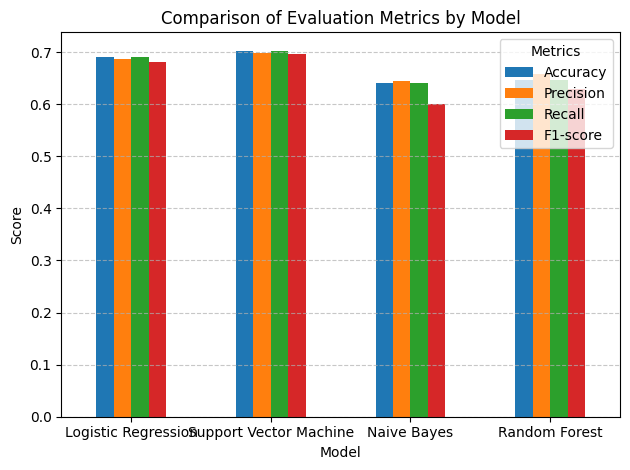

In [ ]:
"""# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing libraries for machine learning models
import pickle
import os

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

def logistic_regression_test(X, y):
    """
""""
   
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Tuning parameters for the model
    crange = [0.01, 0.1, 1, 10, 100]

    # Dictionary to store results
    results = {'C': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

    # Looping through different values of the parameter C
    for num in crange:
        model = LogisticRegression(C=num, solver='liblinear', max_iter=5000, multi_class='auto')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculating evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Storing results
        results['C'].append(num)
        results['Accuracy'].append(acc)
        results['Precision'].append(prec)
        results['Recall'].append(rec)
        results['F1-score'].append(f1)

    # Converting results to a DataFrame
    results_df = pd.DataFrame(results)

    # Finding the index of the best performing model based on accuracy
    best_idx = results_df['Accuracy'].idxmax()

    # Instantiating the best model
    best_model = LogisticRegression(C=results_df.loc[best_idx, 'C'], solver='liblinear', max_iter=5000, multi_class='auto')
    best_model.fit(X_train, y_train)

    # Predicting on the test set using the best model
    y_pred = best_model.predict(X_test)
    print('Logistic Regression Test Accuracy:', accuracy_score(y_test, y_pred))

    # Saving the best model using pickle
    with open('logistic.pickle', 'wb') as handle:
        pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return results_df

def support_vector_machine_test(X, y):
    
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

    # Tuning parameters for the model
    crange = [0.01, 0.1, 1, 10, 100]

    # Dictionary to store results
    results = {'C': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

    # Looping through different values of the parameter C
    for num in crange:
        model = svm.LinearSVC(C=num)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculating evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Storing results
        results['C'].append(num)
        results['Accuracy'].append(acc)
        results['Precision'].append(prec)
        results['Recall'].append(rec)
        results['F1-score'].append(f1)

    # Converting results to a DataFrame
    results_df = pd.DataFrame(results)

    # Finding the index of the best performing model based on accuracy
    best_idx = results_df['Accuracy'].idxmax()

    # Instantiating the best model
    best_model = svm.LinearSVC(C=results_df.loc[best_idx, 'C'])
    best_model.fit(X_train, y_train)

    # Predicting on the test set using the best model
    y_pred = best_model.predict(X_test)
    print('Support Vector Machine Test Accuracy:', accuracy_score(y_test, y_pred))

    # Saving the best model using pickle
    with open('svm.pickle', 'wb') as handle:
        pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return results_df

def naive_bayes_test(X, y):
   
   
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Instantiating the model
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Calculating evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print('Naive Bayes Test Accuracy:', acc)

    # Saving the model using pickle
    with open('nb.pickle', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}

def random_forest_test(X, y):
   
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Instantiating the model
    rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = rf_model.predict(X_test)

    # Calculating evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print('Random Forest Test Accuracy:', acc)

    # Saving the model using pickle
    with open('rf.pickle', 'wb') as handle:
        pickle.dump(rf_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.viridis):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[0]):
        plt.annotate("%.2f" % cm[i][i], xy=(i, i),
                     horizontalalignment='center',
                     verticalalignment='center')
    plt.title(title, fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes.unique()))
    plt.xticks(tick_marks, sorted(classes.unique()), rotation=90)
    plt.yticks(tick_marks, sorted(classes.unique()))
    plt.tight_layout()
    plt.ylabel('True label', fontsize=10, labelpad=-10)
    plt.xlabel('Predicted label', fontsize=10)

if __name__ == '__main__':
    # Loading the cleaned dataset
    yummly_clean_data = pd.read_pickle('yummly_clean.pkl')

    # Extracting unique ingredients
    unique_ingredients = set()
    yummly_clean_data['clean ingredients'].map(lambda x: [unique_ingredients.add(i) for i in x])
    yummly_data = yummly_clean_data.copy()
    for item in unique_ingredients:
        yummly_data[item] = yummly_data['clean ingredients'].apply(lambda x: item in x)
    X_data = yummly_data.drop(yummly_clean_data.columns, axis=1)

    # Testing various classification models
    logistic_results = logistic_regression_test(X_data, yummly_data['cuisine'])
    svm_results = support_vector_machine_test(X_data, yummly_data['cuisine'])
    nb_results = naive_bayes_test(X_data, yummly_data['cuisine'])
    rf_results = random_forest_test(X_data, yummly_data['cuisine'])

    # Presenting results in a tabular format
    results_df = pd.DataFrame({
        'Model': ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes', 'Random Forest'],
        'Accuracy': [logistic_results.loc[logistic_results['Accuracy'].idxmax(), 'Accuracy'],
                     svm_results.loc[svm_results['Accuracy'].idxmax(), 'Accuracy'],
                     nb_results['Accuracy'],
                     rf_results['Accuracy']],
        'Precision': [logistic_results.loc[logistic_results['Accuracy'].idxmax(), 'Precision'],
                      svm_results.loc[svm_results['Accuracy'].idxmax(), 'Precision'],
                      nb_results['Precision'],
                      rf_results['Precision']],
        'Recall': [logistic_results.loc[logistic_results['Accuracy'].idxmax(), 'Recall'],
                   svm_results.loc[svm_results['Accuracy'].idxmax(), 'Recall'],
                   nb_results['Recall'],
                   rf_results['Recall']],
        'F1-score': [logistic_results.loc[logistic_results['Accuracy'].idxmax(), 'F1-score'],
                     svm_results.loc[svm_results['Accuracy'].idxmax(), 'F1-score'],
                     nb_results['F1-score'],
                     rf_results['F1-score']]
    })

    print("Results:")
    print(results_df)

    # Plotting confusion matrix with Random Forest model
    X = X_data.values
    y = yummly_data['cuisine']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 12))
    plot_confusion_matrix(cm_normalized, yummly_data['cuisine'], title='Percentage Correctly Identified Cuisines using only Ingredients as a Predictor')
    plt.savefig('confusion_matrix.jpg')
    plt.show()

    def plot_evaluation_metrics(results_df):
        models = results_df['Model']
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
        scores = results_df.drop(columns=['Model'])
        scores = scores.set_index(models)

        # Plotting
        plt.figure(figsize=(10, 6))
        scores.plot(kind='bar', rot=0)
        plt.title('Comparison of Evaluation Metrics by Model')
        plt.ylabel('Score')
        plt.xlabel('Model')
        plt.legend(title='Metrics')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    plot_evaluation_metrics(results_df)"""



In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pickle

# Assuming models are already trained and saved as 'logistic.pickle', 'svm.pickle', 'nb.pickle', and 'rf.pickle'
# and 'unique_ingredients' is a list of all unique ingredients from the dataset

# Function to preprocess user input and make prediction
def make_prediction(ingredients, model_name):
    # Load the trained model
    with open(f'{model_name}.pickle', 'rb') as f:
        model = pickle.load(f)

    # Preprocess the input ingredients
    ingredients_list = ingredients.lower().split(',')
    ingredients_list = [ing.strip() for ing in ingredients_list]
    X_new = [1 if ing in ingredients_list else 0 for ing in unique_ingredients]

    # Make a prediction
    predicted_cuisine = model.predict([X_new])[0]
    return predicted_cuisine

# Widget for entering recipe ingredients
ingredients_input = widgets.Textarea(
    placeholder='Enter ingredients separated by commas',
    description='Ingredients:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='100px')
)

# Dropdown for model selection
model_selector = widgets.Dropdown(
    options=['logistic', 'svm', 'nb', 'rf'],
    description='Model:',
    disabled=False
)

# Button for prediction
predict_button = widgets.Button(description="Predict Cuisine")

# Output widget for displaying the prediction
prediction_output = widgets.Output()

# Function to handle button click and make prediction
def on_predict_button_clicked(b):
    # Get user input
    ingredients = ingredients_input.value
    model_name = model_selector.value

    # Make prediction
    predicted_cuisine = make_prediction(ingredients, model_name)

    # Display prediction
    with prediction_output:
        prediction_output.clear_output()
        print(f"The predicted cuisine is: {predicted_cuisine}")

# Register the click event
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(ingredients_input, model_selector, predict_button, prediction_output)


Textarea(value='', description='Ingredients:', layout=Layout(height='100px', width='100%'), placeholder='Enter…

Dropdown(description='Model:', options=('logistic', 'svm', 'nb', 'rf'), value='logistic')

Button(description='Predict Cuisine', style=ButtonStyle())

Output()